In [4]:
from PIL import Image
import numpy as np
import os

def preprocess_dataset_2(directory_path):
    categories = ['gland', 'nongland', 'tumor']
    processed_images = []
    allowed_extensions = {'jpg', 'jpeg', 'png', 'bmp', 'gif'}
    for category in categories:
        folder_path = os.path.join(directory_path, category)
        for image_file in os.listdir(folder_path):
            if image_file.split('.')[-1].lower() in allowed_extensions:
                image_path = os.path.join(folder_path, image_file)
                with Image.open(image_path) as img:
                    img_resized = img.resize((224, 224))
                    img_array = np.asarray(img_resized) / 255.0
                    processed_images.append((img_array, category))
    return processed_images

dataset_2_processed = preprocess_dataset_2('Downloads/Dataset2/ProstateCancer')


In [6]:
def preprocess_dataset_3(directory_path):
    categories = ['cat', 'dog', 'wild']
    processed_images = []
    allowed_extensions = {'jpg', 'jpeg', 'png', 'bmp', 'gif'}

    for category in categories:
        folder_path = os.path.join(directory_path, category)
        for image_file in os.listdir(folder_path):
            if image_file.split('.')[-1].lower() in allowed_extensions:
                image_path = os.path.join(folder_path, image_file)
                with Image.open(image_path) as img:
                    img_resized = img.resize((224, 224))
                    img_array = np.asarray(img_resized) / 255.0
                    processed_images.append((img_array, category))

    return processed_images

dataset_3_processed = preprocess_dataset_3('Downloads/Dataset3/AnimalFaces')


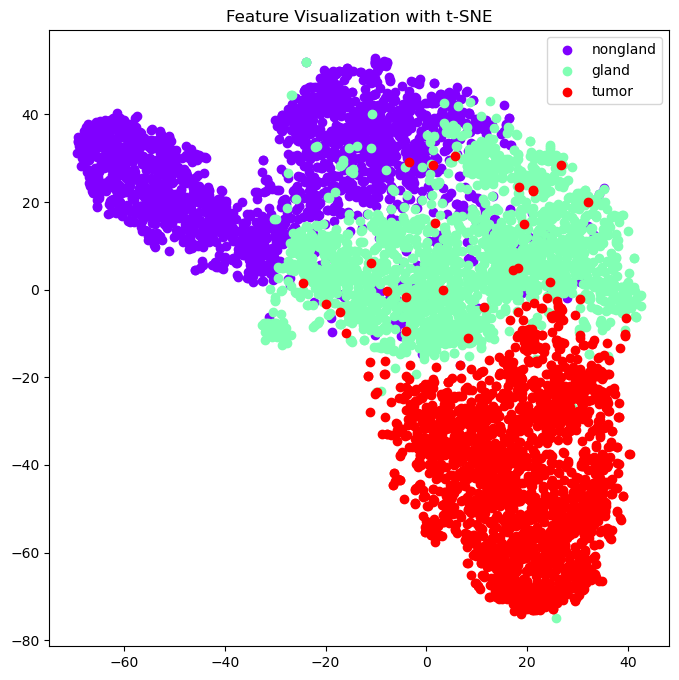

In [8]:
import torch
import torchvision.models as models
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*(list(model.children())[:-1])) 
model.eval()

def extract_features(preprocessed_images):
    features = []
    labels = []
    for img_array, category in preprocessed_images:
        image_tensor = torch.tensor(img_array).unsqueeze(0).permute(0, 3, 1, 2) 
        with torch.no_grad():
            feature = model(image_tensor.float())
        features.append(feature.flatten().numpy())
        labels.append(category)
    return np.array(features), labels


def visualize_features(features, labels):
    tsne = TSNE(n_components=2, random_state=0)
    reduced_features = tsne.fit_transform(features)

    unique_labels = list(set(labels))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    plt.figure(figsize=(8, 8))
    for i, label in enumerate(unique_labels):
        indices = [j for j, x in enumerate(labels) if x == label]
        plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1], color=colors[i], label=label)
    plt.legend()
    plt.title("Feature Visualization with t-SNE")
    plt.show()

features, labels = extract_features(dataset_2_processed)
visualize_features(features, labels)


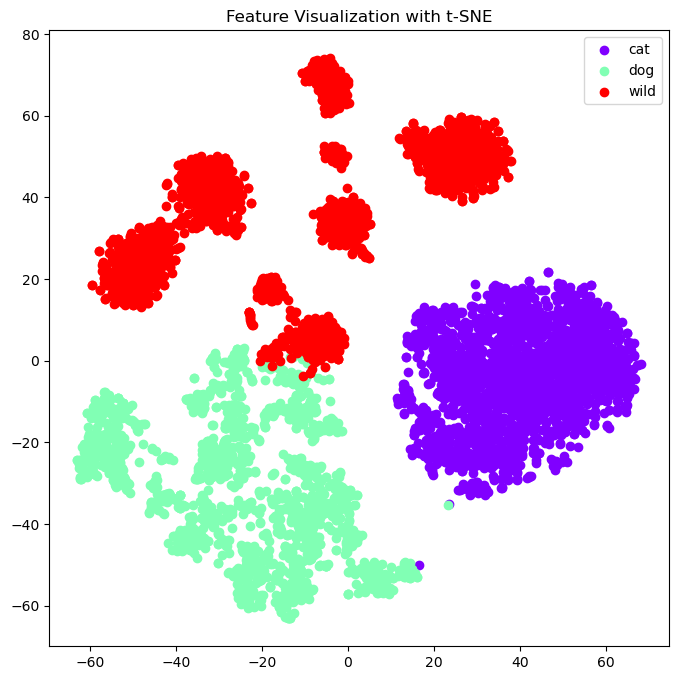

In [9]:
features, labels = extract_features(dataset_3_processed)
visualize_features(features, labels)